# Proyecto: El indice de marginalización de México

**Alumno**: Jesús Martín Gaytán Villarreal

## Introducción

El Consejo Nacional de Población (CONAPO) del gobierno mexicano, realiza cada 5 años un análisis sobre un estudio multidimensional de la pobreza y establece un índice de marginación.

En https://www.gob.mx/cms/uploads/attachment/file/685354/Nota_te_cnica_IMEyM_2020.pdf se puede consultar el documento de como se calculó el índice para la encuesta del 2020. El índice, por municipio, se puede consultar en :

https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372

Junto con los indicadores más importantes para la medición multidimensional de la pobreza.

Para este proyecto te pedimos lo siguiente:

 1. Un repositorio en github para el proyecto. El repositorio deberá llevar un archivo readme.md en el que se explique lo que se hace y los archivos de código, pero no la base de datos. 
 
 
 2. En el archivo (o los archivos) de jupyter realiza lo siguiente:
     1. Descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".
     
    2. Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...) mostrart algunos hallazgos interesantes de la simple inspección visual y por estadísticas básicas de los datos.
    
    3. Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png
    
    4. Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg
    
    5. ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.
    
    6. Grafica la relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.
    
    7. ¿Existe una relación? ¿Cómo podrías analizar con que variable tiene mñas corelación el porcentaje de analfabetismo en personas mayores de 15 años?
    
    8. Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.

In [1]:
# Importamos algunas liberias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Comenzamos importando los datos que estaremos analisando desde el archivo .xls. Como se menciona, estos se encuentran en la hoja *IMM 2020*.

In [2]:
marginacion_df = pd.read_excel('./IMM_2020.xls',sheet_name='IMM_2020')

In [3]:
marginacion_df.head()

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042


Al inspeccionar la dataframe generada, vemos que los nombres de cada columna son claves de los valores que en realidad representan. Esto puede generar problemas al momento de interpretar su valor. 

Para poder interpretarlos más facilmente, podemos utilizar el diccionario de datos disponible en la hoja "Diccionario" dentro del mismo archivo de Excel. Sin embargo, esta esta hoja incluye tambien un titulo en la primera fila, y la informacion que nos interesa abarca el rango A3:B20 (17 filas), por lo que debemos tomar esto en cuenta al momento de importar el diccionario.

In [4]:
data_dict = pd.read_excel('./IMM_2020.xls',sheet_name='Diccionario',skiprows=2,nrows=17,index_col=0)

Ahora que hemos importado el diccionario de datos como una dataframe, podemos mostrarlo dentro de nuestro cuaderno para mayor facilidad de consulta, en lugar de consultar repetidamente el archivo Excel.

Pero antes, ya que algunos variables tienen una descripcion muy extensa, debemos ajustar la candidad de caracteres mostrados en cada columna, para poder mostrar la descripcion completa

In [5]:
pd.options.display.max_colwidth = 100 

In [6]:
data_dict

,Descripción
Variable,
CVE_ENT,Clave de entidad federativa
NOM_ENT,Nombre de entidad federativa
CVE_MUN,Clave del municipio
NOM_MUN,Nombre del municipio
POB_TOT,Población total
ANALF,Porcentaje de población analfabeta de 15 años o más
SBASC,Porcentaje de población de 15 años o más sin educación básica
OVSDE,Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
OVSEE,Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica


Ahora que ya tenemos disponibles tanto los datos como su diccionario, podemos procedes a explorar nuestro dataframe, comenzando por una descripción básica de sus estadísticas.

In [7]:
marginacion_df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Tan solo con una simple inspección de los datos anteriores, podemos observar algunos hallazgos interesantes en ella, por ejemplo:

* Existe al menos un municipio en el pais donde más de la mitad (53%) de la población mayor de 15 años es analfabeta.
* Exite al menos un minicipio en el pais donde casi el 90% de la población mayor de 15 años no cuenta con educación básica.
* En promedio, el 45% de la población por municipio no cuenta con educación básica.
* En la columna **PO2SM** podemos observar que en promedio, el 82% de la población ocupada por municipio en el país gana máximo 2 salarios mínimos. En 2023 esto equivale a aproximadamente \$ 6,306.00 pesos mexicanos al mes.
* Por otro lado, podemos observar en la columna **OVSEE** que en promedio, solo en 1.5% de los ocupantes de viviendas por cada municipio en el país no cuentan con energia eléctrica. Sin embargo, existen municipios donde este porcentaje alcanza el 53%.
* También podemos observar que, en promedio, poco más de un cuarto (26%) de las viviendas en cada municipio se encuentran en hacinamiento, es decir, su espacio fisico no se halla preparado para albergar a todos sus ocupantes.

Despues procedemos a crear una gráfica para comparar más facilmente el porcentaje de municipios en cada estado de acuerdo a su grado de marginación.

Para esto debemos hacer lo siguiente:
1. Reordenar nuestro dataframe, agrupando los valores por estado y por indicide de marginación.
1. Contar el número de municipios que hay por estado y por indice de marginación
1. Una vez contados, volver a agrupar los municipios por estado, pero esta vez para poder obtener su suma.
1. Dividir la cantidad de municipios por grado de marginación entre el total de municipios por estado.
1. Finalmente, graficar nuestro nuevo dataframe agrupado.

Comenzamos manipulando nuestro DataFrame para hacer las agrupaciones y operaciones necesarias.

In [8]:
grouped_df = marginacion_df.groupby(['NOM_ENT','GM_2020'])['NOM_MUN'].count() # Contamos el numero de municipios por entidad por Grado de Marginacion

# Agrupamos por el primer indice (estado) para despues dividir cada valor en el grupo entre la suma del grupo
grouped_df = grouped_df.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()

grouped_df.rename(columns={'NOM_MUN':'PORCENTAJE_MUN'},inplace=True) # Cambiamos el nombre de la columna para evitar confusiones
grouped_df

/var/folders/zg/m2h196h95cn0krdmmwbszhpw0000gp/T/ipykernel_23335/1530526868.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_df = grouped_df.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()


,NOM_ENT,GM_2020,PORCENTAJE_MUN
0,Aguascalientes,Muy bajo,100.000000
1,Baja California,Medio,16.666667
2,Baja California,Muy bajo,83.333333
3,Baja California Sur,Muy bajo,100.000000
4,Campeche,Alto,16.666667
...,...,...,...
118,Yucatán,Muy bajo,6.603774
119,Zacatecas,Alto,3.448276
120,Zacatecas,Bajo,48.275862
121,Zacatecas,Medio,8.620690


Después graficamos la información relevante utilizando matplotlib y seaborn. Seaborn es una libreria utilizada para crear gráficos estadisticos.

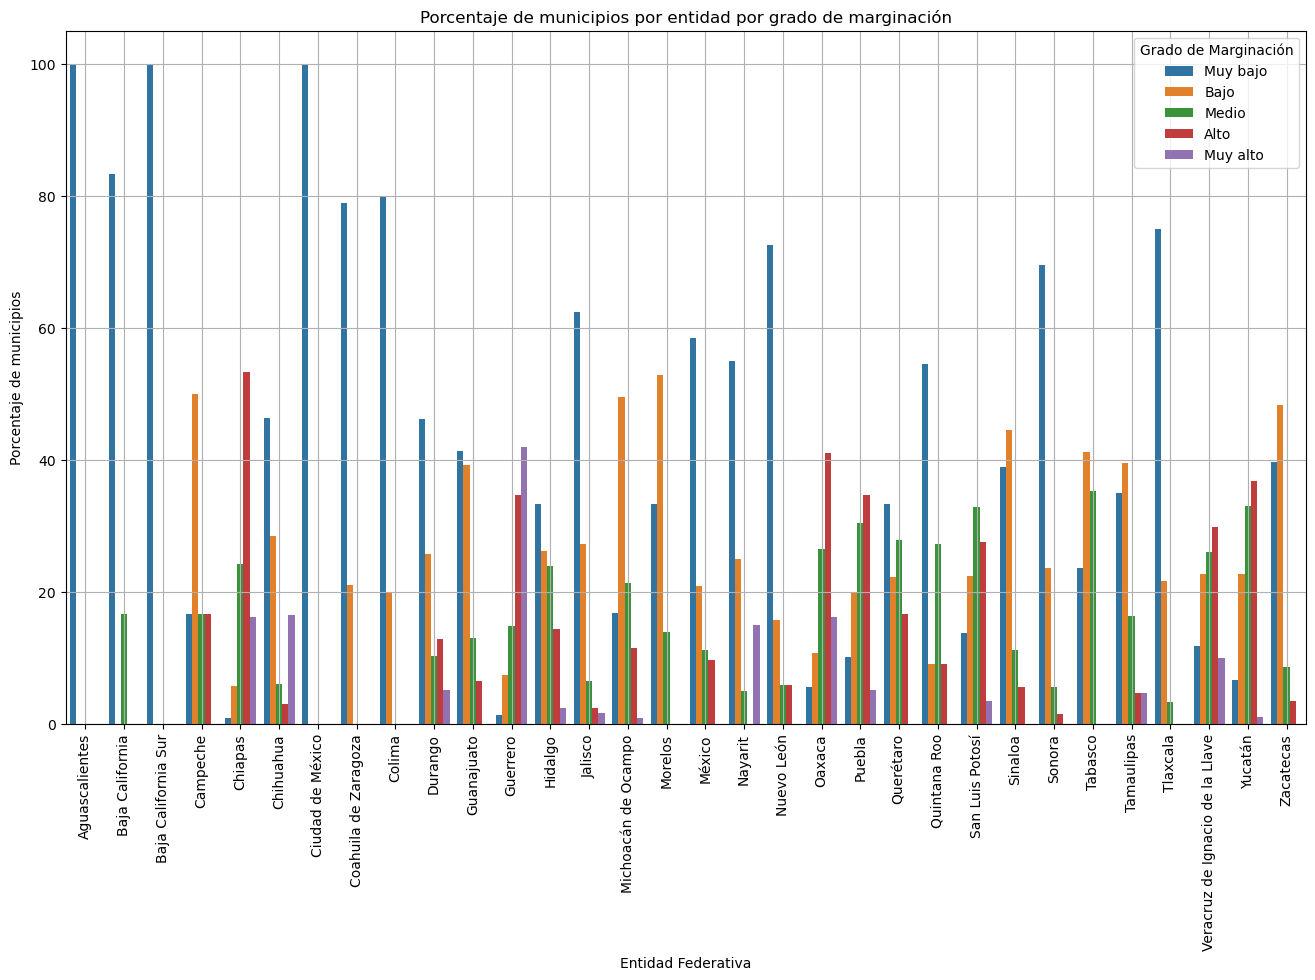

In [9]:
fig, ax = plt.subplots()

fig.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
g = sns.barplot(
    x = 'NOM_ENT', 
    y = 'PORCENTAJE_MUN',
    hue = 'GM_2020',
    data = grouped_df,
    hue_order = ['Muy bajo','Bajo','Medio','Alto','Muy alto'],
    ax = ax)

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax.legend(title="Grado de Marginación")
ax.title.set_text('Porcentaje de municipios por entidad por grado de marginación')
ax.set_xlabel('Entidad Federativa')
ax.set_ylabel('Porcentaje de municipios')
ax.grid()

# Rotamos las etiquetas del eje x
plt.xticks(rotation=90)

# Guardamos nuestra figura al archivo municipios.png, el segundo argumento es para que no aparezca cortada.
fig.savefig(fname='img/municipios.png',bbox_inches='tight') 

plt.show()

Después procedemos a realizar un gráfico similar, pero esta vez graficando el porcentaje de **población** por estado segun su grado de marginacíon.

El procedimiento será similar al anterior, debemos hacer las manipulaciónes correspondientes a nuestro DataFrame antes de poder crear nuestro gráfico. La diferencia será que esta vez agruparemos por estado y grado de marginación, y después sumaremos la población total de cada estado.

In [10]:
# Agrupamos de nuevo por entidad y grade de marginación, pero esta vez sumamos los valores de la columna POB_TOT (población total por municipio)
grouped_df2 = marginacion_df.groupby(['NOM_ENT','GM_2020'])['POB_TOT'].sum()

# Volvemos a agrupar por estado, para ahora dividir el total de la población de cada uno entre su población total, y multiplicamos por 100
grouped_df2 = grouped_df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()

# Renombramos la columna para evitar confusiones
grouped_df2.rename(columns={'POB_TOT':'PORCENTAJE_POB'},inplace=True)

# Mostramos nuestro nuevo DataFrame
grouped_df2

/var/folders/zg/m2h196h95cn0krdmmwbszhpw0000gp/T/ipykernel_23335/70067428.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped_df2 = grouped_df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).to_frame().reset_index()


,NOM_ENT,GM_2020,PORCENTAJE_POB
0,Aguascalientes,Muy bajo,100.000000
1,Baja California,Medio,3.119325
2,Baja California,Muy bajo,96.880675
3,Baja California Sur,Muy bajo,100.000000
4,Campeche,Alto,8.469424
...,...,...,...
118,Yucatán,Muy bajo,56.687498
119,Zacatecas,Alto,0.429926
120,Zacatecas,Bajo,21.386836
121,Zacatecas,Medio,6.305505


Una vez agrupado nuestro DataFrame, procedemos a generar un gráfico similar al anterior, solo que esta vez graficaremos el porcentaje de la población en vez del de los municipios.

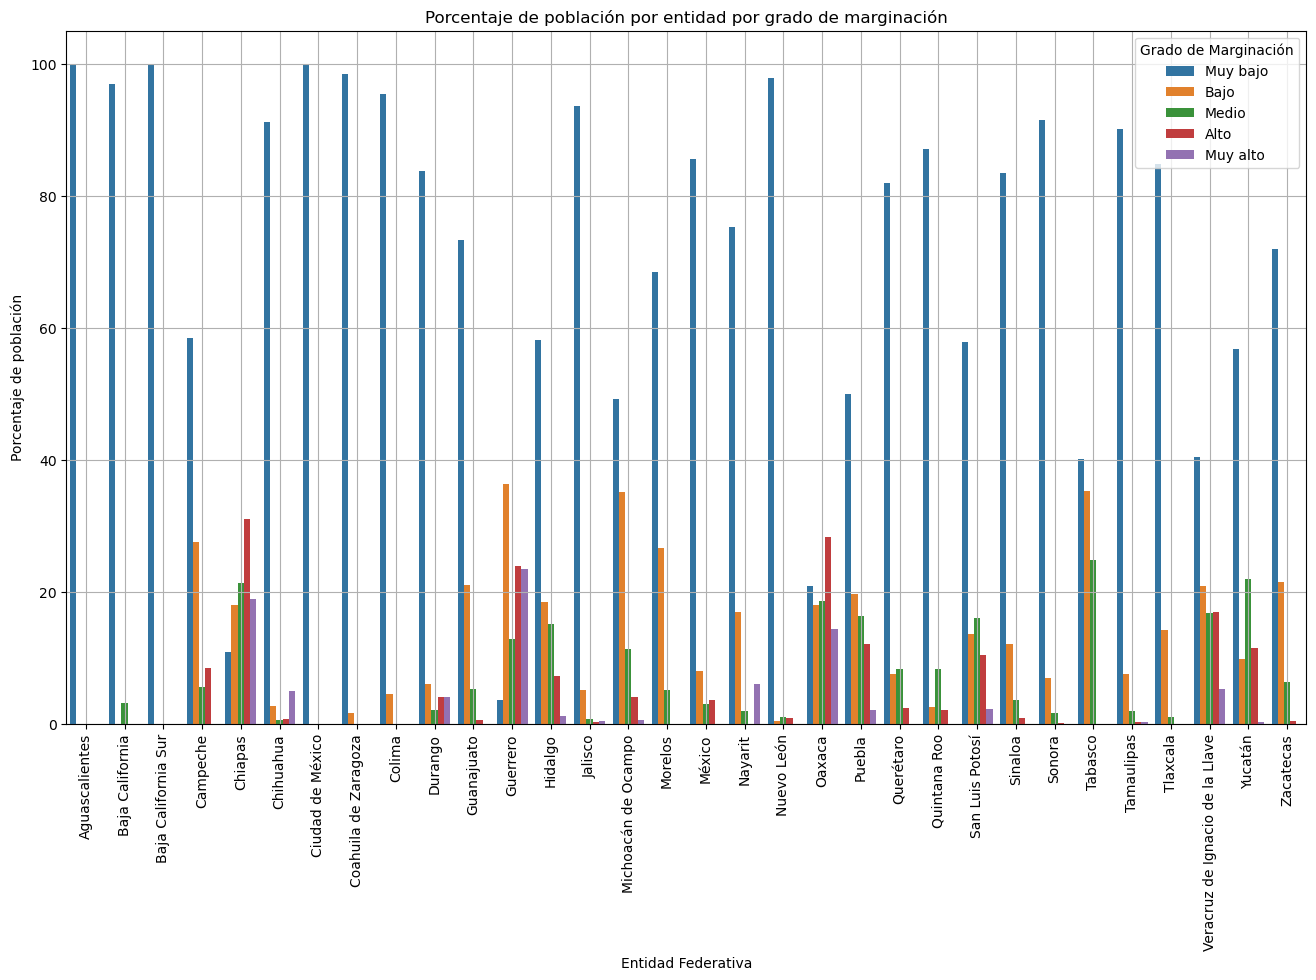

In [11]:
fig2, ax2 = plt.subplots()

fig2.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
g2 = sns.barplot(
    x = 'NOM_ENT', 
    y = 'PORCENTAJE_POB',
    hue = 'GM_2020',
    data = grouped_df2,
    hue_order = ['Muy bajo','Bajo','Medio','Alto','Muy alto'],
    ax = ax2)

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax2.legend(title="Grado de Marginación")
ax2.title.set_text('Porcentaje de población por entidad por grado de marginación')
ax2.set_xlabel('Entidad Federativa')
ax2.set_ylabel('Porcentaje de población')
ax2.grid()

# Rotamos las etiquetas del eje x
plt.xticks(rotation=90)

# Guardamos nuestra figura al archivo municipios.png, el segundo argumento es para que no aparezca cortada.
fig2.savefig(fname='img/poblacion.png',bbox_inches='tight') 

plt.show()

Al comparar esta nueva gráfica con la anterior, podemos observar una tendencia importante: en la mayoría de los estados, con algunas excepciones, el la población se concentra en su gran mayoría en una minoría de municipios de muy baja marginación.

Esta proporción no concuerda con el porcentaje de municipios por grado de marginación en cada estado.
* Un claro ejemplo de esto es **Chihuahua**, que a pesar de contar con un 50% de municipios con muy baja marginación, alrededor del 90% de su población vive en este nivel de marginación. Dicho de otra forma: *el 50% de los municipios del estado, los cuales cuentan con un nivel muy bajo de marginación, alberga al 90% de la población del estado.*

* Otro ejemplo de esta tendencia es **Puebla**, donde tan solo el 10% de municipios, los cuales cuentan con un nivel muy bajo de marginación, alberga al 50% de los poblanos.

* Por último podemos observar como en **Yucatán** el 60% de la población se concentra en el 5% de los municipios del estado, los cuales son considerados como de muy baja marginación.

* Sin embargo, en los estados tipicamente considerados como los más marginados del país, esta tendencia se rompe. Un ejemplo de esto es **Chiapas**, donde la tercera parte de la población se distribuye en la mitad (~50%) de los municipios de este estado, los cuales tienen un nivel alto de marginación. Una tendencia similar se puede apreciar en **Oaxaca** y **Guerrero**.

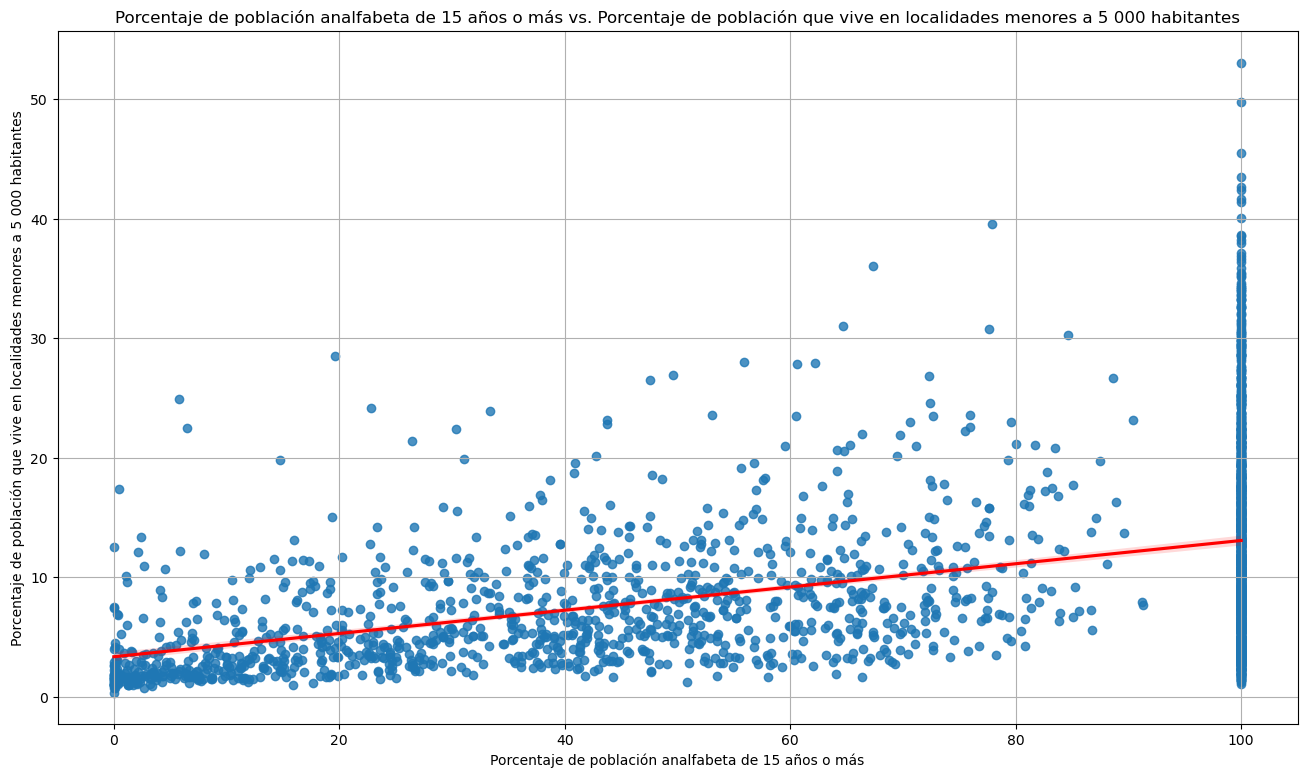

In [17]:
fig3, ax3 = plt.subplots()

fig3.set_size_inches(16,9)

# Generamos nuestro gráfico de barras
g3 = sns.regplot(
    x = 'PL.5000', 
    y = 'ANALF',
    data = marginacion_df,
    ax = ax3,
    line_kws = {'color':'red'})

# Agregamos información relevante y una cuadrícula para nuestro gráfico
ax3.title.set_text(f"{data_dict.loc['ANALF'].item()} vs. {data_dict.loc['PL.5000'].item()}")
ax3.set_xlabel(f"{data_dict.loc['ANALF'].item()}")
ax3.set_ylabel(f"{data_dict.loc['PL.5000'].item()}")
ax3.grid()


plt.show()

In [13]:
data_dict.loc['ANALF'].item()

'Porcentaje de población analfabeta de 15 años o más'

In [14]:
data_dict.loc['PL.5000'].item()

'Porcentaje de población que vive en localidades menores a 5 000 habitantes'